### **1. Introduction**

High-dimensional data is fairly common nowadays. It can be defined as a data set where the number of regressors/predictors (P) is greater than the number of observations (N). High-dimensional data could be a result of two phenomena: <br>
1. When the number of characteristics per observation is larger than the sample size. Example: when the medical tests per patient are larger than the chosen sample size <br>  
2. When the researcher includes a large number of variable transformations in the regression. Example: since the true functional form is unknown, the researcher adds interaction terms, variables with functional transformation, etc. such that the number of regressors is greater than the number of observations. <br>
**What if $P>N$?** <br>
When the number of regressors is greater than the number of observations, the regression cannot be identified using OLS <br>
**What if $P=N$?** <br>
When the number of regressors is equal to the number of observations, the OLS fits the data perfectly such that $R^2=1$ <br>
**What if $P<N$?** <br>
When the number of regressors is smaller than the number of observations, we will not only be able to identify the model but also avoid overfitting issues as otherwise. When we have high-dimensional data, we need to reduce the dimensions (regularize) such that $P<N$ to draw meaningful conclusions from it.

### **2. Theoretical Background**

#### **Approximately Sparse Regression Models**

The authors consider the following model to forecast the outcome ($y_i$) and treat $g(w_i)$ as a high-dimensional, linear model such that <br>
<br>
$$y_i=g(w_i)+\zeta_i \hspace{0.1cm}, \hspace{0.25cm} i=1,...n \hspace{0.25cm} \& \hspace{0.25cm} E(\zeta_i|w_i)=0$$ <br>
$$g(w_i) =\sum_{j=1}^{p}{\beta_jx_{i,j}}+r_{p,i} \hspace{0.25cm}$$
<div style="text-align: justify">   
$r_{p,i}$ is an approximation error. To identify the model, avoid overfitting and for better prediction ability, we need to regularize the function $g(\cdot)$. Typically, researchers regularize based on economic theory and intuition. However, the question of the correct variables and the transformations being chosen is left unanswered. Another approach to reduce dimensions is the approximate sparsity of the high-dimensional linear model. <br>
</div>
<blockquote>“Approximate sparsity imposes a restriction that only $s$ variables among all of $x_{i,j}$, where $s$ is much smaller than $n$, have associated coefficients $\beta_j$ that are different from $0$, while permitting a nonzero approximation error $r_{p,i}$.” </blockquote>
This implies only S of the P regressors have coefficients that are not equal to zero and $S<P<N$. One of the methods for estimating the parameter of sparse high-dimensional models is the Least Absolute Shrinkage and Selection Operator (LASSO). In this paper, the authors use a variant of LASSO estimator defined as: <br> 
<br>    
$$\hat{\beta}=\mathop{\rm argmax}\limits_b\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{i,j}b_j)^2+\lambda\sum_{j=1}^{p}|b_j|\gamma_j \hspace{0.25cm}$$
<br>  
$\lambda>0$ is the penalty and $\gamma_j$ are the penalty loadings. LASSO leads to some of the coefficients being set exactly to zero. Thus, it could be used in variable selection process by simply selecting the variables with nonzero coefficients. This addresses the problem when researcher doesn’t know a priori exactly which variables should in the model. <br> 
<br>      
    
This variant is proposed in [Belloni, Chen, Chernozhukov, and Hansen (2012)](https://www.econometricsociety.org/publications/econometrica/2012/11/01/sparse-models-and-methods-optimal-instruments-application).

#### **Model Selection when the goal is Causal Inference**

The main aim of this paper is to use data mining procedures like LASSO for regularizing high-dimensional data to produce meaningful inferences. Authors stress that when the end goal is causal inference, LASSO should be used only for regularization purposes i.e, to only select variables whose coefficients are nonzero but not to interpret their coefficients directly. This is because: <br> 
1. Such procedures are designed for forecasting purposes and not to inference about model parameters <br> 
2. Model selection mistakes occur which then might lead to the problem of omitted variable bias <br>  

Thus, naively using results obtained from LASSO estimation might lead to inference problems. The authors explain when and how to use LASSO when the end goal of the researcher is causal inference about model parameters.

#### **Inference with Selection among many Instruments (Z)**

The authors consider the following linear instrumental variable model <br>
$$y_i=\alpha d_i+\varepsilon_i \hspace{0.25cm} where \hspace{0.25cm} d_i={z_i}^{'}\Pi+r_i+\nu_i$$ <br>
$$E(\varepsilon_i|z_i)=E(\nu_i|z_i,r_i)=0 \hspace{0.25cm} but \hspace{0.25cm} E(\varepsilon_i|\nu_i)\ne0$$ <br>
$d_i$ is an endogenous variable, $z_i$ is a p-dimensional vector of instruments and $r_i$ is an approximation error. In this scenario, the number of instruments is greater than the number of observations $(Z>N)$ which calls for selection among the instruments to be able to estimate $\alpha$ <br>

**Choosing instruments in case of one endogenous variable:** <br>
Step 1: Use LASSO to regress $d_i$ (endogenous variable) on $z_i$ (instrumental variables) <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard 2SLS estimation using the selected instrument(s) from step 2 <br>

**Choosing instruments in case of more than one endogenous variable:** <br>
Step 1: Use LASSO to regress $d_i$ on $z_i$ for each of the endogenous variables <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 for each of the endogenous variables <br>
Step 3: Carry out standard 2SLS estimation using the union of the selected instruments from step 2

#### **Inference with Selection among many Controls (C)**

The authors consider the following linear model where a treatment variable, $d_i$, is taken as exogenous after conditioning on control variables <br>


$$\tag{1}\label{eq:1}y_i=\alpha d_i+ x_i^{'}\theta_y+r_{yi}+\zeta_i \hspace{0.1cm} ,\hspace{0.25cm} E(\zeta_i|d_i,x_i,r_{yi})=0$$
<div style="text-align: justify"> $x_i$ is a p-dimensional vector of controls and $r_{yi}$ is an approximation error. In this scenario, the number of controls is greater than the number of observations $(C>N)$ which calls for selection among the controls to be able to estimate $\alpha$ which is the effect of the treatment on the outcome. To ensure $\alpha$ remains in the model as it is the parameter of interest, one should exclude the treatment variable from the model selection process. Thus, regularization will only be carried out on the remaining exogenous variables (controls) which are referred to as ‘nuisance’ by the authors. </div> <br>

**Naïve Approach for Selection among many Controls (C)**  <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard OLS estimation using the selected control(s) from step 2
<div style="text-align: justify">Running LASSO with $y_i$ on $x_i$ (step 1) only allows us to select those variables with nonzero coefficients associated to $y_i$. However, it ignores the relationship between treatment variable and controls leading to omitted variable bias. This is a major drawback of using the naïve approach. To understand the relationship between treatment variable and controls, the following equations are introduced by the authors </div> <br>

$$\tag{2}\label{eq:2}d_i=x_i^{'}\theta_d+r_{di}+\nu_i \hspace{0.1cm} ,\hspace{0.25cm} E(\nu_i|x_i,r_{di})=0$$ <br>

$$\tag{3}\label{eq:3}y_i=x_i^{'}(\alpha\theta_d+\theta_y)+(\alpha r_{di}+r_{yi})+(\alpha\nu_i+\zeta_i)=x_i^{'}\pi+r_{ci}+\varepsilon_i \hspace{0.1cm} ,\hspace{0.25cm} E(\varepsilon_i|x_i,r_{ci})=0$$ <br>

<div style="text-align: justify">Substituting equation \eqref{eq:2} in \eqref{eq:1} will yield \eqref{eq:3}. $r_{ci}$ is a composite approximation error. Spare high-dimensional methods work best for predictions and not inferences. Equation \eqref{eq:1} represents a structural model where the goal to is to learn the causal inference. Whereas, equations \eqref{eq:2} and \eqref{eq:3} represent predictive relationships, which can be estimated by high-dimensional methods. Thus, to counter against the omitted variable bias, we use both the equations to select the controls. This is called the Post-Double Selection (PDS) LASSO.</div> <br>

**Post-Double-Selection (PDS) for Selection among many Controls (C)** <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Use LASSO to regress $d_i$ (treatment variable) on $x_i$ (control variables) <br>
Step 4: Select the control(s) with nonzero coefficients from step 3 <br>
Step 5: Carry out standard OLS estimation using the union of selected controls from step 2 and step 4 <br>

<img src="simulation copy.png" width ="500" height=500>


Figure 1 is a simulation study from [Belloni, Chernozhukov, and Hansen (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?redirectedFrom=fulltext). It compares the sampling distribution of the estimator of $\alpha$ from naïve approach and PDS approach. The left panel suffers from the omitted variable bias which is absent in the right panel.<br>
The authors use three empirical examples in this paper and implement the LASSO for selecting controls and instruments in high-dimensional data.

### **3. Empirical Example 1: Estimating the Impact of Eminent Domain on House Prices**

*Chen, Daniel L., and Susan Yeh. 2012. [“Growth under the Shadow of Expropriation? The Economic Impacts of Eminent Domain.”](http://www.sole-jole.org/13463.pdf)*

#### **3.1. Introduction**

<div style="text-align: justify">
Eminent Domain also known as land acquisition or expropriation is the power of the government to take away private property, in exchange for some money, for public use. The US constitution gives this right to the government under the Fifth Amendment called the Takings Clause. Pro-plaintiff rulings are federal court rulings that say that the government seizure of a private property was unlawful. In the paper by Chen and Yeh (2012), they try to find the effect of such federal court decisions regarding eminent domain on housing prices. <br>
<br>
$$log(Case–Shiller_{ct})=\alpha\cdot TakingsLaw_{ct}+\beta_c+\beta_t+\gamma_{c}t+W_{ct}^{'}\delta+\varepsilon_{ct}$$
<br>
$Case–Shiller_{ct}$ is the average of the Case–Shiller home price index within circuit court $c$ at time $t$. $TakingsLaw_{ct}$ represents the number of pro-plaintiff appellate takings decisions in federal circuit court $c$ and year $t$. $W_{ct}$ are exogenous variables and $\beta_c$, $\beta_t$ and $\gamma_{c}t$ are respectively circuit-specific effects, time-specific effects, and circuit-specific time trends. The parameter of interest, $\alpha$, thus represents the effect of an additional pro-plaintiff decision on property prices.<br>
</div>

#### **3.2. Identification**

<div style="text-align: justify">
The model presented above suffers from endogeneity issue. In their paper, Chen and Yeh (2012), state that court decisions are endogenous. For instance, the pro-plaintiff ruling may be more likely if housing prices in an area are expected to increase. To counter this problem, they employ an instrumental variable approach and consider the characteristics of judges to be the instruments for judicial decisions. Judges are randomly assigned to three-judge panels. Since the characteristics of judges are unrelated to any other factors except for their judicial decisions that may affect the housing prices, the instruments are argued to be valid. <br>
</div>    
<img src="CG1.png" width ="300" height=300>
<div style="text-align: justify">
The above causal graph illustrates the relationship between pro-plaintiff decisions (D) and housing prices (Y). Since judicial decisions (D) are endogenous, the estimates of regressing Y on D will be biased. ?????Explain the backdoor path???? To resolve this, the authors use the characteristics of judges (Z) as an instrument and argue it to be valid. Thus Z satisfies the exclusion restriction and effects Y only through D. <br>
The characteristics of judges include their preferences over governments and individual property rights, gender, race, religion, political party affiliation, source of academic degrees, and if the judges had been promoted from a district court. The list of potential instruments not only included these characteristics for each judge but also interaction terms with various combinations. The data set consists of 183 observations, 72 control variables, and 147 instrumental variables. The model cannot be identified as $N(183)<P(219)$. To estimate this model for causal inference, there is a need to regularize. <br>
In this paper, Belloni et al. (2014), authors use a LASSO variant for reducing the dimensions by selecting among many instruments. They wrote a program for the same due to which, using glmnet package will not give the same results as theirs. <br>
</div>

#### **3.3. Replication**

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
#loading the data
df1=pd.read_excel("/Users/satwika/Desktop/PROJECT/Data/JEPReplicationFilesStata/EminentDomain/CSExampleData.xlsx")
df=df1.drop('nControl',axis=1)
df.shape

(183, 149)

In [4]:
df.head(5)

,CSIndex,NumProCase,Z1xNR,Z1xJDP,Z1xD,Z2xD,Z3xD,Z1xDSq,Z1xDCu,Z1xF,...,Z1xPROC1xM,Z1xPROC1xEV,Z1xPROC1xPRO,Z1xPROC1xNW,Z1xMC1xJ,Z1xMC1xCAT,Z1xMC1xNR,Z1xMC1xEV,Z1xMC1xM,Z1xMC1xNW
0,0.071146,0.119098,-0.067744,0.102502,-0.024818,0.247578,0.085026,-0.375188,-1.487713,0.091808,...,-0.480826,0.096378,0.210369,-0.267153,-0.127030,-0.055966,-0.341225,-0.139522,-0.460450,-0.658211
1,0.024656,-0.082198,0.102703,0.198287,0.010865,0.179050,-0.021043,0.510609,3.374342,0.076370,...,0.129356,-0.044288,0.593042,0.887688,0.306955,-0.069646,0.282035,-0.092997,-0.004318,0.536386
2,0.051935,-0.001592,-0.126258,-0.000265,-0.540937,-0.282949,0.102560,-0.123052,2.311071,0.005722,...,1.352279,0.231767,0.699562,-0.208514,0.808672,0.291625,-0.050386,0.585404,1.199408,0.485358
3,-0.017423,-0.037161,-0.052893,-0.214215,0.164018,-0.413705,-0.100744,-0.272045,-3.395065,0.073229,...,-0.496520,0.083141,-1.442539,-0.490165,-0.981868,0.242997,0.054547,-0.006271,-0.141818,0.078161
4,-0.057601,0.096159,0.144511,0.150797,0.495104,0.244553,-0.020875,0.619919,-0.361951,0.123615,...,0.481784,-0.712932,-0.682744,-1.148617,0.231269,-0.062621,0.361904,0.094149,0.447288,-0.603682


In [1]:
#Using Lasso to select the instruments on R
library(readxl)
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
df=read_excel("/Users/satwika/Desktop/PROJECT/Data/JEPReplicationFilesStata/EminentDomain/CSExampleData.xlsx")
mat=as.matrix(df)
d=mat[1:183,1] #endogenous variable
z=mat[1:183,3:149] #instruments
grid=10^seq(10,-2,length=100)

New names:
* Z1xDC1xBAP -> Z1xDC1xBAP...48
* Z1xDC1xBAP -> Z1xDC1xBAP...53
* Z1xFC1xBAP -> Z1xFC1xBAP...59
* Z1xFC1xBAP -> Z1xFC1xBAP...64
* Z2xFC1xBAP -> Z2xFC1xBAP...106
* … and 1 more problem


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

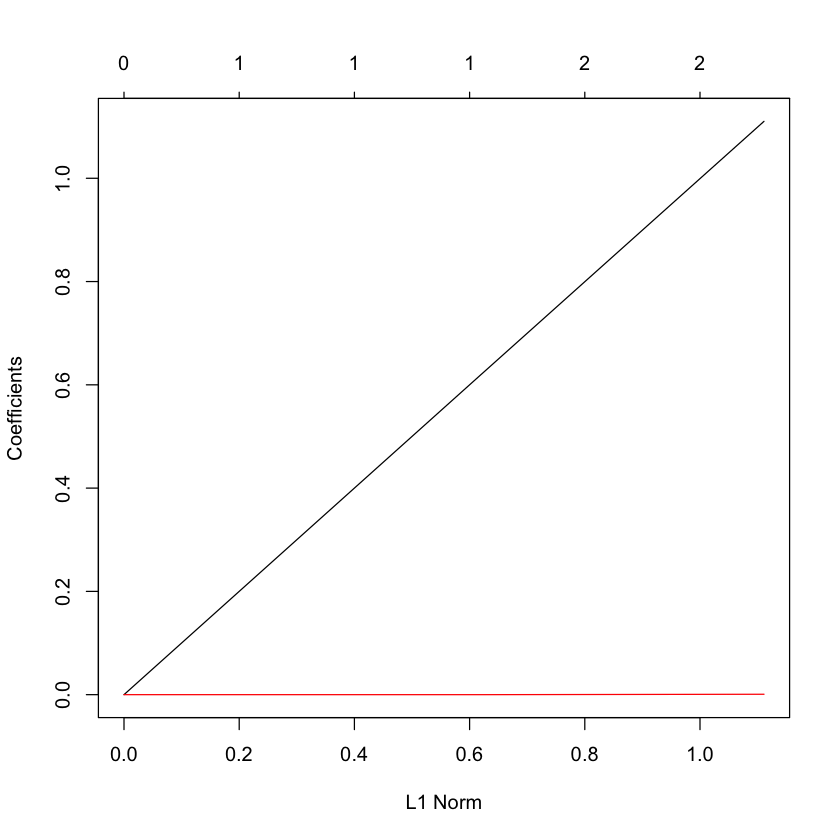

In [3]:
lasso.mod=glmnet(z,d,alpha=1,lambda=grid)
plot(lasso.mod)

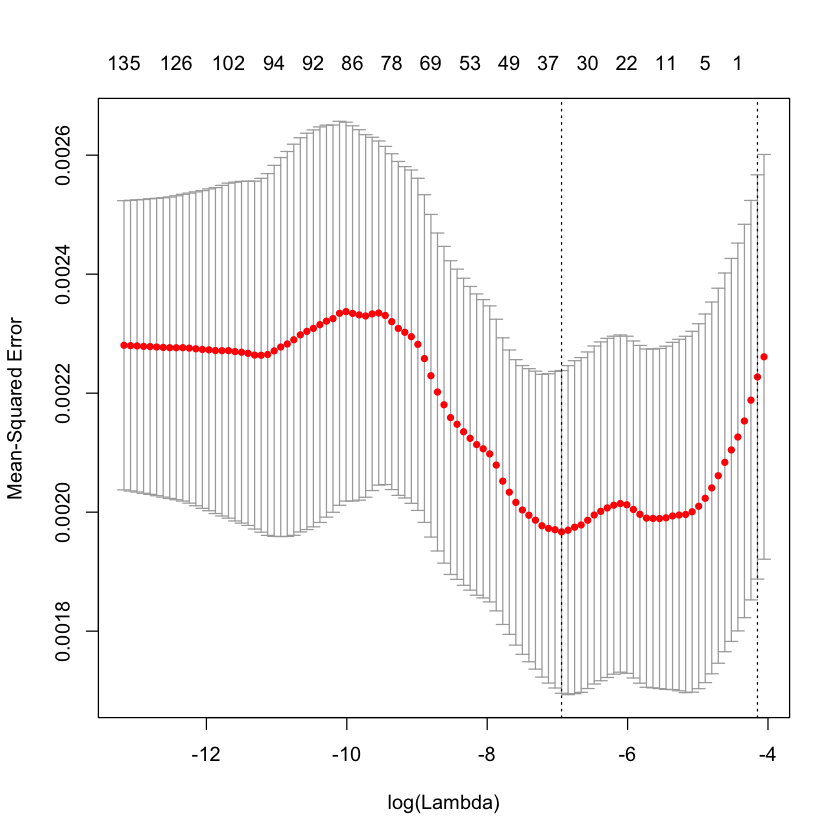

In [4]:
lasso.fit <- cv.glmnet(z,d,alpha=1)
plot(lasso.fit)

In [5]:
bestlam=lasso.fit$lambda.min
bestlam

[1] 0.0009675147

In [6]:
lasso.coef=predict(lasso.mod,type="coefficients",s=bestlam)
lasso.coef
#Make a list of var != 0
#1. Z1xPRO
#2. Z2xJDPC1xJ
#Relevance: show corr graph  Z1, Z2 =>X

148 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -0.0155563470
Z1xNR             .           
Z1xJDP            .           
Z1xD              .           
Z2xD              .           
Z3xD              .           
Z1xDSq            .           
Z1xDCu            .           
Z1xF              .           
Z2xF              .           
Z1xNW             .           
Z1xB              .           
Z1xJ              .           
Z2xJ              .           
Z1xCAT            .           
Z2xCAT            .           
Z1xIBA            .           
Z2xIBA            .           
Z3xIBA            .           
Z1xBAP            .           
Z2xBAP            .           
Z3xBAP            .           
Z2xJDP            .           
Z3xJDP            .           
Z1xJDPSq          .           
Z1xJDPCu          .           
Z1xE              .           
Z2xE              .           
Z3xE              .           
Z1xESq            .        

#### Since I got comletely different results, decided to use the authors' result for computing 2SLS

                                 OLS Regression Results                                
Dep. Variable:             NumProCase   R-squared (uncentered):                   0.183
Model:                            OLS   Adj. R-squared (uncentered):              0.178
Method:                 Least Squares   F-statistic:                              40.66
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                    1.45e-09
Time:                        15:48:36   Log-Likelihood:                         -7.0982
No. Observations:                 183   AIC:                                      16.20
Df Residuals:                     182   BIC:                                      19.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

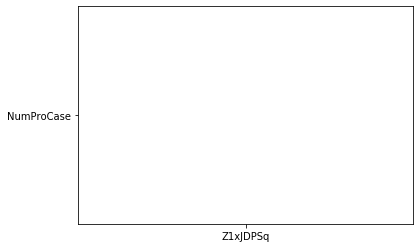

In [5]:
#First Stage Least Square with instrument selected by the authors using lassoshooting method
rslt_fs= smf.ols(formula="NumProCase ~ Z1xJDPSq - 1", data=df).fit(use_t="none")
print(rslt_fs.summary())
plt.plot(["Z1xJDPSq"], ["NumProCase"]) #Relevance: the result of the first stage and the graph show how relevant Z=>X

In [6]:
#Second Stage Least Square with instrument selected by the authors using lassoshooting method
df['predicted_NumProCase'] = rslt_fs.predict()
rslt_ss= smf.ols(formula="CSIndex ~ predicted_NumProCase - 1", data=df).fit(use_t="none")
rslt_ss_robust = rslt_ss.get_robustcov_results()
print(rslt_ss_robust.summary())

                                 OLS Regression Results                                
Dep. Variable:                CSIndex   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              6.981
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                     0.00896
Time:                        15:48:38   Log-Likelihood:                          286.84
No. Observations:                 183   AIC:                                     -571.7
Df Residuals:                     182   BIC:                                     -568.5
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

                                 OLS Regression Results                                
Dep. Variable:             NumProCase   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8666
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                       0.353
Time:                        15:48:40   Log-Likelihood:                         -25.114
No. Observations:                 183   AIC:                                      52.23
Df Residuals:                     182   BIC:                                      55.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

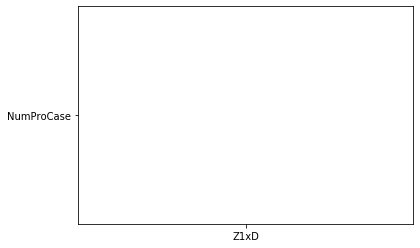

In [7]:
#First Stage Least Square with instrument selected by the authors for comparision
cmpr_fs= smf.ols(formula="NumProCase ~ Z1xD - 1", data=df).fit(use_t="none")
print(cmpr_fs.summary())
plt.plot(["Z1xD"], ["NumProCase"]) #Relevance: the result of the first stage and the graph show how relevant Z=>X

In [8]:
#Second Stage Least Square with instrument selected by the authors for comparision
df['predicted_NumProCase_cmpr'] = cmpr_fs.predict()
cmpr_ss= smf.ols(formula="CSIndex ~ predicted_NumProCase_cmpr - 1", data=df).fit(use_t="none")
cmpr_ss_robust = cmpr_ss.get_robustcov_results()
print(cmpr_ss_robust.summary())

                                 OLS Regression Results                                
Dep. Variable:                CSIndex   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.804
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                       0.181
Time:                        15:48:43   Log-Likelihood:                          285.32
No. Observations:                 183   AIC:                                     -568.6
Df Residuals:                     182   BIC:                                     -565.4
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

#### Additional Contribution for Example 1

In [ ]:
#First Stage Least Square with all the instruments
Y = df.iloc[:,1]
#Y
X = df.iloc[:,2:]
#X
all_fs= smf.ols(formula="Y ~ X - 1", data=df).fit(use_t="none")
print(all_fs.summary())
#Plot correlation graphs

In [ ]:
#Second Stage Least Square with all the instruments
df['predicted_NumProCase_all'] = all_fs.predict()
all_ss= smf.ols(formula="CSIndex ~ predicted_NumProCase_all - 1", data=df).fit(use_t="none")
all_ss_robust = all_ss.get_robustcov_results()
print(all_ss_robust.summary())

In [ ]:
#First Stage Least Square using the instruments selected by glmnet on R
glmnet_fs= smf.ols(formula="NumProCase ~ Z1xPRO + Z2xJDPC1xJ - 1", data=df).fit(use_t="none")
print(glmnet_fs.summary())
#Plot correlation graphs

In [ ]:
#Second Stage Least Square using the instruments selected by glmnet on R
df['predicted_NumProCase_glmnet'] = glmnet_fs.predict()
glmnet_ss= smf.ols(formula="CSIndex ~ predicted_NumProCase_glmnet - 1", data=df).fit(use_t="none")
glmnet_ss_robust = glmnet_ss.get_robustcov_results()
print(glmnet_ss_robust.summary())

In [ ]:
#Table comparing all the results:
#1. All instruments 
#2. Instruments which authors chose
#3. Iinstruments from glmnet 
#4. Instrument based on intruition 

In [ ]:
#Robustness checks: Refer to other paper